In [1]:
library(ggplot2)
library(caret)
library(biomaRt)
listMarts(host="www.ensembl.org")
ensembl = useMart(biomart = "ENSEMBL_MART_ENSEMBL",
                  dataset="mmusculus_gene_ensembl",
                  host = "oct2016.archive.ensembl.org")

Loading required package: lattice


biomart,version
ENSEMBL_MART_ENSEMBL,Ensembl Genes 88
ENSEMBL_MART_MOUSE,Mouse strains 88
ENSEMBL_MART_SNP,Ensembl Variation 88
ENSEMBL_MART_FUNCGEN,Ensembl Regulation 88
ENSEMBL_MART_VEGA,Vega


In [2]:
cd <- read.csv('/home/rstudio/SingleCellProject/R_wdir/Final_data/highly_variant_genes_all_417.csv', header =T)
meta <- read.csv('/home/rstudio/SingleCellProject/R_wdir/Final_data/metadata_all_filtered_final_417.csv',row.names=1)
head(cd)
head(meta)

ensembl_gene_id,meanNormCount,P2272_1004,P2272_1005,P2272_1006,P2272_1009,P2272_1010,P2272_1012,P2272_1013,P2272_1014,⋯,P7657_1181,P7657_1182,P7657_1184,P7657_1185,P7657_1186,P7657_1187,P7657_1188,P7657_1190,P7657_1191,P7657_1192
ENSMUSG00000000001,120.224183,0.0000000,0.6842291,9.6277601,0.2338652,0.000000,0.000000,0.000000,0.4840486,⋯,0.00000,0.000000,7.418372,0.0000000,0.00000,0.00000,1.099338,7.092704,0.00000,0.000000
ENSMUSG00000000031,413.967552,0.0000000,0.3823038,0.2446205,0.0000000,0.000000,0.000000,0.000000,0.0000000,⋯,0.00000,0.000000,0.000000,0.0000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000
ENSMUSG00000000056,33.739029,0.3374374,5.2136259,0.0000000,3.5309297,2.275288,0.000000,0.000000,0.0000000,⋯,0.00000,0.000000,0.000000,0.8570245,0.00000,0.00000,7.592088,0.000000,0.00000,0.000000
ENSMUSG00000000058,100.081963,0.3374374,0.0000000,0.0000000,6.7239529,2.275288,0.000000,0.000000,0.0000000,⋯,0.00000,0.000000,9.136075,0.0000000,0.00000,0.00000,0.000000,0.000000,10.01324,8.492850
ENSMUSG00000000078,2210.421383,12.4018545,2.4728317,10.2844352,11.3578432,3.333222,3.732372,2.807135,8.4172492,⋯,13.05936,4.414935,4.560177,11.3359410,11.00922,10.76684,7.998825,11.794868,11.43066,7.829718
ENSMUSG00000000093,3.723828,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.000000,0.0000000,⋯,0.00000,0.000000,2.589828,0.0000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000


,cell,Sample,N_primer,S_primer,Library,Stage,Individual,Sample_type,Sorting_Date,Plate.well,ERCC,Library_Preparation,Sequencing,Batch_seq,clusterboot,clusterboot2
P2272_1004,P2272_1004,S48,N703,S504,L234,P2,m1,single,2/5/2015,1-1/G1,1410014,5/20/2015,pair-end,batch_1,2,1
P2272_1005,P2272_1005,S49,N701,S517,L236,P2,m1,single,2/5/2015,1-1/A2,1410014,5/20/2015,pair-end,batch_1,1,1
P2272_1006,P2272_1006,S50,N701,S502,L239,P2,m1,single,2/5/2015,1-1/D2,1410014,5/20/2015,pair-end,batch_1,2,2
P2272_1009,P2272_1009,S53,N702,S517,L246,P2,m1,single,2/5/2015,1-1/C3,1410014,5/20/2015,pair-end,batch_1,3,3
P2272_1010,P2272_1010,S54,N702,S502,L253,P21,m1,single,1/15/2015,2-1/B1,1310010,5/29/2015,pair-end,batch_1,2,2
P2272_1012,P2272_1012,S56,N702,S504,L257,P21,m1,single,1/15/2015,2-1/F1,1310010,5/29/2015,pair-end,batch_1,2,2


In [3]:
genes <- cd$ensembl_gene_id
gene.list <- getBM(filters= "ensembl_gene_id",
                             attributes= c("ensembl_gene_id",
                                           "external_gene_name"),
                                           values=genes,
                                           mart= ensembl)
gene.name <- merge(cd,gene.list, by = "ensembl_gene_id")
mat <- gene.name
# Some data filtering and reshaping
rownames(mat) <- mat[,420]
mat <- mat[,-420]
mat <- mat[,-1]
mat <- mat[,-1]
base.pca <- prcomp(t(mat))
tail=as.vector(apply(base.pca$rotation[,1:5],2,function(x) tail(names(sort(x)),n=50)))
head=as.vector(apply(base.pca$rotation[,1:5],2,function(x) head(names(sort(x)),n=50)))
top.load.genes = unique(c(head,tail))
top.load.genes <- as.data.frame(top.load.genes)

colnames(top.load.genes) <- 'external_gene_name'
top.500 <- merge(top.load.genes,gene.name,by='external_gene_name')

rownames(top.500) <- top.500[,1]
top.500 <- top.500[,-1]
top.500 <- top.500[,-1]
top.500 <- top.500[,-1]


tr.top.500 <- t(top.500)
head(tr.top.500)


,1110017D15Rik,1700007K13Rik,2310007B03Rik,2610028H24Rik,4930523C07Rik,5330417C22Rik,8430408G22Rik,Abcc3,Abcg1,Ace,⋯,Ubxn10,Upk3a,Vars,Vim,Wdfy1,Wdr6,Wdr66,Zbtb38,Zfyve26,Zyx
P2272_1004,0,0,7.4108634,0.0000000,8.8855344,11.2224671,7.7983884,8.031283,0.0000000,0,⋯,0,4.5644930,5.9326362,1.367965,7.1865316,0.0000000,0,10.0249534,9.8892293,2.145884
P2272_1005,0,0,0.0000000,0.0000000,0.0000000,0.9337725,0.0000000,5.116023,0.3823038,0,⋯,0,7.7291544,9.2475552,0.000000,0.0000000,0.0000000,0,8.7091116,0.3823038,9.932373
P2272_1006,0,0,0.0000000,0.0000000,0.6363052,10.0638376,0.0000000,8.632272,0.0000000,0,⋯,0,0.0000000,0.2446205,0.000000,0.4537148,0.2446205,0,0.2446205,9.7609252,1.197531
P2272_1009,0,0,0.0000000,7.8150644,5.8408163,4.4671333,0.2338652,8.678173,0.2338652,0,⋯,0,0.2338652,0.0000000,0.000000,9.0421633,1.9969970,0,0.2338652,4.4439909,8.211755
P2272_1010,0,0,0.4320793,0.0000000,9.2779583,10.0157793,3.5637045,8.672920,0.0000000,0,⋯,0,4.9716986,2.6410027,0.000000,5.3751957,6.3881012,0,0.0000000,7.7129235,2.557894
P2272_1012,0,0,4.0411378,0.2609181,2.1276654,2.0606895,9.3320150,0.000000,0.0000000,0,⋯,0,4.1254862,0.0000000,8.499043,0.2609181,0.2609181,0,8.9645608,8.2855879,7.183084


In [34]:
model.data <- meta[meta$clusterboot2 %in% c('2','3','4','5'),]
train.data <- tr.top.500[model.data$cell,]
test.data <- meta[meta$clusterboot2 %in% c('1'),]
test.data <- tr.top.500[test.data$cell,]

train.data <- as.data.frame(train.data)
train.data$clusters <- as.character(model.data$clusterboot2) 


In [5]:
model.fit <- train(clusters ~ ., data=train.data, method="rf", prox=TRUE)

Loading required package: randomForest
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



In [6]:
model.fit

Random Forest 

253 samples
393 predictors
  4 classes: '2', '3', '4', '5' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 253, 253, 253, 253, 253, 253, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
    2   0.8894473  0.7273889
  197   0.9663451  0.9267904
  393   0.9552242  0.9028543

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was mtry = 197. 

In [28]:
centers <- classCenter(train.data[, c('Foxj1','Scgb1a1')], train.data$clusters, model.fit$finalModel$prox)
centers <- as.data.frame(centers); centers$clusters <- rownames(centers)

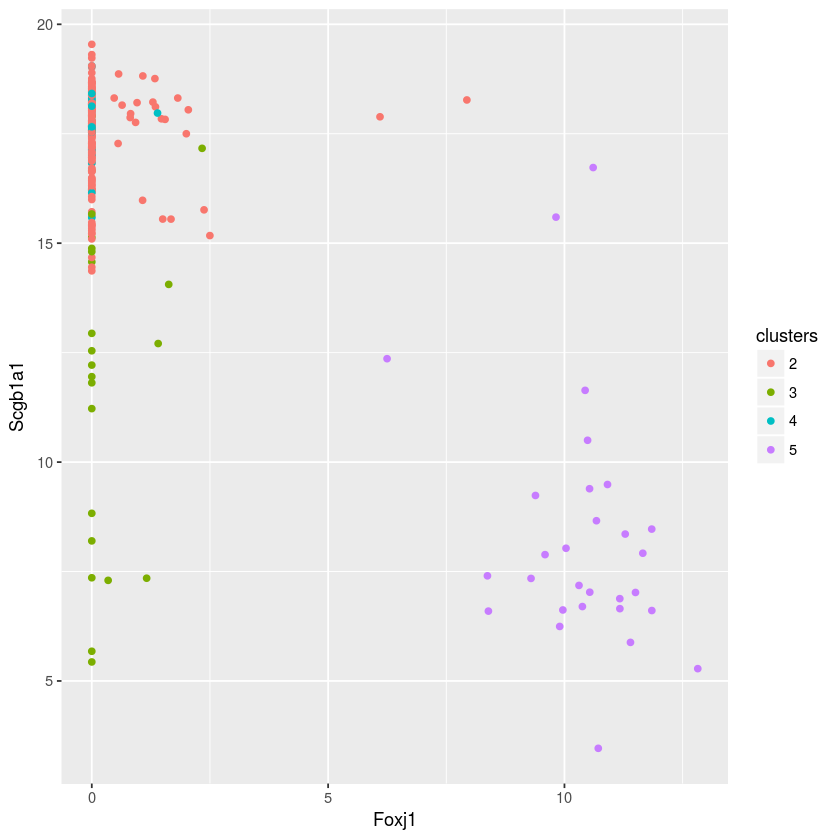

In [29]:
p <- qplot(Foxj1, Scgb1a1, col=clusters, data=train.data)
p + geom_point(aes(x=Foxj1, y=Scgb1a1, col=clusters), size=5, shape=4, data=irisP)
p



In [35]:
pred.class <- predict(model.fit, test.data)
table(pred.class)

pred.class
 2  3  4  5 
94  5  0  2 

In [36]:
sessionInfo()

R version 3.3.1 (2016-06-21)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 16.04.1 LTS

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] randomForest_4.6-12 biomaRt_2.30.0      caret_6.0-73       
[4] lattice_0.20-35     ggplot2_2.2.1.9000 

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.2-5         repr_0.10            reshape2_1.4.2      
 [4] splines_3.3.1        colorspace_1.3-2     stats4_3.3.1        
 [7] mgcv_1.8-17          XML_3.98-1.6         ModelMetrics_1.1.0  
[10] e1071_1.6-8          nloptr_1.0.4         DBI_0.6